# Assignment 2. Data Acquirance and Statistical Tests

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2024)*  

<!-- *For your questions refer to mehrshadtaji61@gmail.com or @m522t on Telegram* -->

### Description
In the first part of this homework, you are going to get familiar with Python tools used for web scraping and data crawling. Next, you will thoroughly investigate the tools and methods frequently used in statistics.

### Information  
Complete the information box below.

In [ ]:
full_name = "Leili Motahari"
student_id = ""

### Import necessary packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
import re
import string
from bs4 import BeautifulSoup
import sqlite3
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# ====================================
# feel free to import any other package
# ====================================

## 1. NBA Leaders!

The <b><a href="https://global.nba.com/"> NBA official website</a></b> offers the latest news on players, teams, and playoffs for basketball fans. For this task, we'll focus solely on players from the 2024-2025 season. Our plan is to scrape the freely available data from the site and then analyze it statistically.

### 1.1 Crawling Season Leaders Data

Inspect the webpage at https://global.nba.com/statistics/

It contains the top 50 season leaders along with their statistics. The columns in the table represent the following :

* RANK: The player's current ranking
* PLAYER: The player's name
* TEAM: The player's current team
* G: Games played
* GS: Games started
* PPG: Points per game
* RPG: Rebounds per game
* APG: Assists per game
* MPG: Minutes played per game
* EFF: Efficiency rating, a measure of overall statistical contribution
* FG%: Field goal percentage (how often a player makes a shot)
* 3P%: 3-point field goal percentage
* FT%: Free throw percentage
* OFF: Offensive rebounds per game
* DEF: Defensive rebounds per game
* SPG: Steals per game
* BPG: Blocks per game
* TO: Turnovers per game
* PF: Personal fouls per game
* TO: Turnovers per game
* PF: Personal fouls per game
* PO: Points per game

Using the `BeautifulSoup` package, scrape the data from this webpage. You must first scrape and save the data to a Python dictionary. To store the data, you will be using a SQLite database.

In [44]:
import requests
from bs4 import BeautifulSoup
import json
def create_sqlite_table(db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS nba_leaders')
    cursor.execute('''
        CREATE TABLE nba_leaders (
            rank INTEGER,                
            player TEXT PRIMARY KEY,                 
            team TEXT,                    
            g INTEGER,                   
            gs INTEGER,                   
            ppg REAL,                     
            rpg REAL,                     
            apg REAL,                    
            mpg REAL,                     
            eff REAL,                    
            fg REAL,                    
            threep REAL,                  
            ft REAL,                     
            off REAL,                    
            def REAL,                    
            spg REAL,                    
            bpg REAL,                     
            turnovers REAL,              
            pf REAL                      
        )
    ''')

    conn.commit()
    conn.close()
    print("Table created successfully!")
    
    


def scrape_nba_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    data = soup.contents[0]
    data = dict(json.loads(data))['payload']['players']
    # print(data['payload']['players'])
    final_data = {}

    for i,player in enumerate(data) : 
        playerInfo = player['playerProfile']
        playerTeamProfile = player['teamProfile']
        playerStateInfo = player['statAverage']
        final_data [i] = {}
        final_data [i]['RANK'] = player['rank']
        final_data [i]['PLAYER'] = playerInfo['displayName']
        final_data [i]['TEAM'] = playerTeamProfile['abbr']
        final_data [i]['g'] = playerStateInfo['games']
        final_data [i]['gs'] = playerStateInfo['gamesStarted']
        final_data [i]['PPG'] = playerStateInfo['pointsPg']
        final_data [i]['RPG'] = playerStateInfo['rebsPg']
        final_data [i]['APG'] = playerStateInfo['assistsPg']
        final_data [i]['MPG'] = playerStateInfo['minsPg']
        final_data [i]['MPG'] = playerStateInfo['minsPg']
        final_data [i]['EFF'] = playerStateInfo['efficiency']
        final_data [i]['FG'] = playerStateInfo['fgpct']
        final_data [i]['3P'] = playerStateInfo['tppct']
        final_data [i]['FT'] = playerStateInfo['ftpct']
        final_data [i]['OOF'] = playerStateInfo['offRebsPg']
        final_data [i]['OOF'] = playerStateInfo['offRebsPg']
        final_data [i]['DEF'] = playerStateInfo['defRebsPg']
        final_data [i]['SPG'] = playerStateInfo['stealsPg']
        final_data [i]['BPG'] = playerStateInfo['blocksPg']
        final_data [i]['TO'] = playerStateInfo['turnoversPg']
        final_data [i]['PF'] = playerStateInfo['foulsPg']    
    return final_data

def save_to_sqlite(data, db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    for key, player_data in data.items():
        cursor.execute('''
            INSERT INTO nba_leaders (
                rank, player, team, g, gs, ppg, rpg, apg, mpg, eff, fg, threep, ft,
                off, def, spg, bpg, turnovers, pf
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (
            int(player_data.get('RANK', 0)),
            player_data.get('PLAYER', ''),
            player_data.get('TEAM', ''),
            int(player_data.get('g', 0)),
            int(player_data.get('gs', 0)),
            float(player_data.get('PPG', 0)),
            float(player_data.get('RPG', 0)),
            float(player_data.get('APG', 0)),
            float(player_data.get('MPG', 0)),
            float(player_data.get('EFF', 0)),
            float(player_data.get('FG', 0)),
            float(player_data.get('3P', 0)),
            float(player_data.get('FT', 0)),
            float(player_data.get('OOF', 0)),
            float(player_data.get('DEF', 0)),
            float(player_data.get('SPG', 0)),
            float(player_data.get('BPG', 0)),
            float(player_data.get('TO', 0)),
            float(player_data.get('PF', 0))
        ))
    
    conn.commit()
    conn.close()
    print("Data saved to database successfully!")

create_sqlite_table()
data = scrape_nba_data("https://global.nba.com/statsm2/league/playerstats.json?conference=All&country=All&individual=All&locale=en&pageIndex=0&position=All&qualified=false&season=2024&seasonType=2&split=All+Team&statType=points&team=All&total=perGame")
save_to_sqlite(data)

Table created successfully!
Data saved to database successfully!


### 1.2 Crawling Players Personal Information

Inspect the webpage at https://global.nba.com/playerindex/

It provides personal information of all the players in the season along with the functionality to filter the players by name.

To be able to filter the players in the webpage, you must perform the scraping using the package `Selenium`.

Create another SQL table named **players_personal_info**. this one and the table in the previous questions must be related via a defined key.

In [46]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import time
import sqlite3

def create_sqlite_table(db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    
    cursor.execute('DROP TABLE IF EXISTS players_personal_info')
    cursor.execute('''
        CREATE TABLE players_personal_info (
            player TEXT PRIMARY KEY,         -- Player's unique identifier (Primary Key)
            team TEXT,                       -- Player's team
            pos TEXT,                   -- Player's position (e.g., G, F, C)
            ht TEXT,                     -- Height (e.g., 6-8)
            wt TEXT,                     -- Weight (e.g., 243 lbs)
            exp INTEGER,              -- Years of experience in the NBA
            country TEXT,                    -- Country/Nationality
            FOREIGN KEY (player) REFERENCES nba_leaders(player) ON DELETE CASCADE
        )
    ''')

    
    conn.commit()
    conn.close()



    


def scrape_nba_players_by_initial(url, db_file='nba_leaders.db'):
    driver_path = "chromedriver.exe"  
    service = Service(driver_path)
    driver = webdriver.Chrome(service=service)
    driver.get(url)
    
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    cursor.execute("SELECT player FROM nba_leaders")
    players = cursor.fetchall()  
    # print(players)
    for i,player in enumerate(players) : 
        letter = player[0].split()[1][0].upper()
        print(letter)
        div_element = driver.find_element(By.CSS_SELECTOR, f"div[data-ng-click=\"changeInitial('{letter}')\"]")
        div_element.click()
        # time.sleep(2)
        search_box =driver.find_element(By.NAME, "player-search")
        search_box.send_keys(" ".join(player[0].split("_")) , Keys.ENTER)
        # time.sleep(6)
        table = driver.find_element(By.TAG_NAME, 'table')
        attribute_value = table.get_attribute("class")
        tbody = table.find_element(By.TAG_NAME, 'tbody')
        rows = tbody.find_elements(By.TAG_NAME, 'tr')
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, 'td')
            row_data = []  

            for idx, cell in enumerate(cells):
                try:
                    if idx == 0: 
                        link = cell.find_element(By.TAG_NAME, 'a')
                        text = link.text.strip()  
                    else: 
                        text = cell.text.strip()  
                except:
                    text = "N/A"  
                row_data.append(text)  

           
            player_data = dict(zip(['player' , 'team' , 'pos' , 'ht' , 'wt' , 'ex' , 'country'] , [player[0]]+row_data[2:]))
            data[i] = player_data

            

        


   
 
        
        

    driver.quit()
    return data

  
  


def save_to_sqlite(data, db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    for key, player_data in data.items():
        print(player_data)
        cursor.execute('''
            INSERT OR REPLACE INTO players_personal_info (
                player, team, pos, ht, wt, exp, country
            ) VALUES (?, ?, ?, ?, ?, ?, ?)
        ''', (
            player_data.get('player', ''),  
            player_data.get('team', ''),   
            player_data.get('pos', ''),     
            player_data.get('ht', ''),     
            player_data.get('wt', ''),      
            int(player_data.get('ex')), 
            player_data.get('country', '')  
        ))

    conn.commit()
    conn.close()
    print("Data saved to database successfully!")
    
   

create_sqlite_table()
players_data = scrape_nba_players_by_initial("https://global.nba.com/playerindex/")
print(players_data)
save_to_sqlite(players_data)

D
E
I
M
M
C
T
L
G
F
H
D
B
S
M
W
A
M
B
J
W
H
J
B
T
E
P
R
A
D
I
B
J
D
J
V
P
B
S
B
B
G
C
Y
M
H
M
W
L
W
{0: {'player': 'Anthony Davis', 'team': 'LAL', 'pos': 'F-C', 'ht': '6-10', 'wt': '253 lbs', 'ex': '12', 'country': 'United States'}, 1: {'player': 'Anthony Edwards', 'team': 'MIN', 'pos': 'G', 'ht': '6-4', 'wt': '225 lbs', 'ex': '4', 'country': 'United States'}, 2: {'player': 'Brandon Ingram', 'team': 'NOP', 'pos': 'F', 'ht': '6-8', 'wt': '190 lbs', 'ex': '8', 'country': 'United States'}, 3: {'player': 'Brandon Miller', 'team': 'CHA', 'pos': 'F', 'ht': '6-7', 'wt': '200 lbs', 'ex': '1', 'country': 'United States'}, 4: {'player': 'CJ McCollum', 'team': 'NOP', 'pos': 'G', 'ht': '6-3', 'wt': '190 lbs', 'ex': '11', 'country': 'United States'}, 5: {'player': 'Cade Cunningham', 'team': 'DET', 'pos': 'G', 'ht': '6-6', 'wt': '220 lbs', 'ex': '3', 'country': 'United States'}, 6: {'player': 'Cam Thomas', 'team': 'BKN', 'pos': 'G', 'ht': '6-3', 'wt': '210 lbs', 'ex': '3', 'country': 'Japan'}, 7: {'

### 1.3 Find out the cause!

Next, we'll explore the causal relationships between specific player attributes and their ranking within the top 50. Apply the techniques you learned in class, including propensity score matching, t-tests, and A-B testing, to analyze the following potential causations:

* Does having African heritage contribute to better performance in the NBA?

* Does height cause improved performance in the NBA?

## 2. Basketball for life!

In this question, we want to affirm our analyses based on a more populated dataset. Seasons statistics has been provided from 1950 to 2022. The dataset is freely avaiable at <a href="https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021">Kaggle</a>. However, the dataset is provided at directory `./data/Q2/` as well in case of unstable internet connections.

The specfications of the columns can be view at <a href="https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021?select=seasons_stats.csv">this wepbage</a>.

### 2.1 Cleaning Phase 

The season statistics such as field goals, 3-pointer success rates, assists, ... are of crucial importance to our analyses. Hence, drop the records with null values in these fields.

In [47]:
file_path = "data/Q2/seasons_stats.csv"
nba_data = pd.read_csv(file_path, encoding='latin1')
nba_data.head()  
print("\U0001F447")
cleaned_data = nba_data.dropna()
cleaned_data.head()

👇


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
5700,5730,1980,Tiny Archibald*,PG,31.0,BOS,80,80.0,2864.0,383,...,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5
5718,5748,1980,Larry Bird*,PF,23.0,BOS,82,82.0,2955.0,693,...,14.0,25.3,5.6,5.6,11.2,0.182,2.7,2.6,5.3,5.4
5751,5781,1980,M.L. Carr,SF,29.0,BOS,82,7.0,1994.0,362,...,14.1,20.2,1.9,3.2,5.2,0.125,-0.2,1.5,1.3,1.7
5756,5786,1980,Don Chaney,SG,33.0,BOS,60,0.0,523.0,67,...,13.7,18.3,-0.4,0.8,0.4,0.033,-4.0,0.9,-3.1,-0.1
5772,5802,1980,Dave Cowens*,C,31.0,BOS,66,55.0,2159.0,422,...,9.9,20.1,1.9,3.6,5.4,0.121,-0.7,2.0,1.4,1.8


### 2.2 Extracting Meaningful Signals 

From the dataset, identify the most important statistical factors contributing to a player's overall performance score. Your task is to combine the provided statistics—**field goals**, **2-pointer success rate**, **3-pointer success rate**, **assists**, **blocks**, **steals**, **rebounds**, **minutes played**, and other relevant fields—into a single performance indicator.

A simple approach could be to combine the attributes together using a linear model. Feel free to use any methods to adjust the weights. Plot your performance indicator to inspect the distribution visually.

PCA Weights:
Age: 0.0089
G: 0.1671
GS: 0.1847
MP: 0.2062
FG: 0.2096
FGA: 0.2044
FG%: 0.1229
3P: 0.0888
3PA: 0.0916
3P%: 0.0121
2P: 0.2042
2PA: 0.2008
2P%: 0.0922
eFG%: 0.1062
FT: 0.1977
FTA: 0.2002
FT%: 0.0425
ORB: 0.1635
DRB: 0.1922
TRB: 0.1895
AST: 0.1502
STL: 0.1779
BLK: 0.1344
TOV: 0.1965
PF: 0.1834
PTS: 0.2102
PER: 0.1748
TS%: 0.1223
3PAr: -0.0532
FTr: 0.0440
ORB%: 0.0396
DRB%: 0.0589
TRB%: 0.0575
AST%: 0.0449
STL%: 0.0136
BLK%: 0.0384
TOV%: -0.0349
USG%: 0.0822
OWS: 0.1875
DWS: 0.1886
WS: 0.2068
WS/48: 0.1553
OBPM: 0.1647
DBPM: 0.0856
BPM: 0.1758
VORP: 0.1840

Sample Performance Scores:
      Performance
5700     6.228604
5718    12.138537
5751     3.958404
5756    -3.800495
5772     4.556015


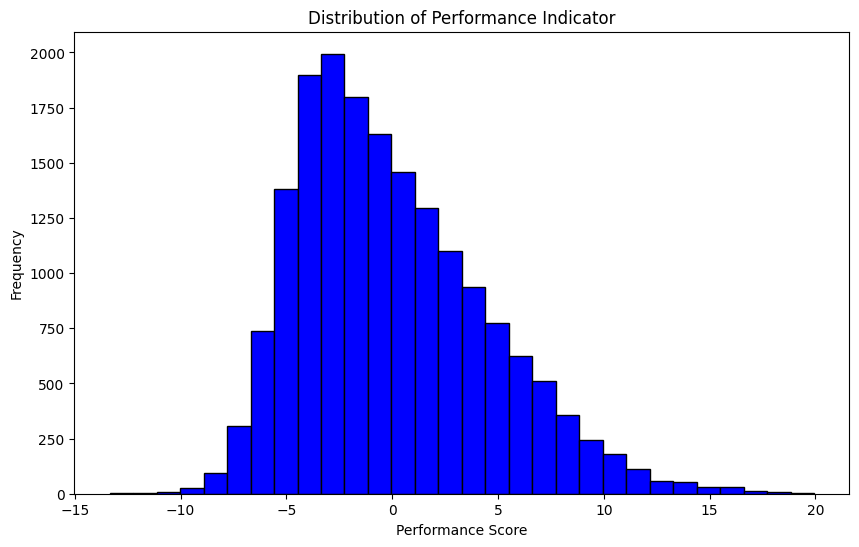

In [48]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

nba_data = cleaned_data
columns_to_drop = ['Unnamed: 0', 'Player', 'Year', 'Tm', 'Pos']
nba_data_cleaned = nba_data.drop(columns=columns_to_drop, errors='ignore')
nba_data_numeric = nba_data_cleaned.select_dtypes(include=[np.number])
nba_data_numeric = nba_data_numeric.dropna()

scaler = StandardScaler()
standardized_data = scaler.fit_transform(nba_data_numeric)
pca = PCA(n_components=1)
pca.fit(standardized_data)

weights_pca = pca.components_[0]
print("PCA Weights:")
for column, weight in zip(nba_data_numeric.columns, weights_pca):
    print(f"{column}: {weight:.4f}")

performance_indicator = np.dot(standardized_data, weights_pca)
nba_data['Performance'] = performance_indicator
print("\nSample Performance Scores:")
print(nba_data[['Performance']].head())
plt.figure(figsize=(10, 6))
plt.hist(nba_data['Performance'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Performance Indicator')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()


### 2.3 Hypothesis Tests

Examine the following hypothesis tests using the methods discussed in class, such as ANOVA, t-tests, A-B testing, Pearson and Spearman correlations. Make sure to provide p-values for each experiment and thoroughly justify your conclusions.

* Hypothesis 1: Player performance has significantly increased over time.

* Hypothesis 2: The average height and weight of NBA players has increased significantly over time.

* Hypothesis 3: Players from *Kentucky* college have a higher performance than players from other colleges.

* Hypothesis 4: There is a significant correlation between a player's height and their average points per game.

In [49]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind

###########################
# Hypothesis 1: Performance (PTS) improvement over time
###########################
def analyze_performance_over_time(df_merged):
    df_merged = df_merged.dropna(subset=["Year", "PTS"])
    group_counts = df_merged.groupby("Year").size()

    
    model_anova = ols("PTS ~ C(Year)", data=df_merged).fit()
    anova_res = sm.stats.anova_lm(model_anova, typ=2)

    print("\n=== ANOVA: Mean PTS across years ===")
    print(anova_res)

    p_value = anova_res["PR(>F)"][0]
    if p_value < 0.05:
        print("=> At least one decade shows a significant difference in mean PTS compared to others.")
    else:
        print("=> No significant differences in mean PTS across years.")


    model_lm = ols("PTS ~ Year", data=df_merged).fit()
    print("\n=== Regression: PTS ~ Year ===")
    print(model_lm.summary())


###########################
# Hypothesis 3: Do players from Kentucky college perform better than others?
###########################
def analyze_kentucky_vs_others(df_merged):
    df_merged = df_merged.dropna(subset=["Colleges", "PTS"])
    df_kentucky = df_merged[df_merged["Colleges"] == "Kentucky"]
    df_others = df_merged[df_merged["Colleges"] != "Kentucky"]

    print(f"[Hypothesis 3] Kentucky rows: {len(df_kentucky)}, Others: {len(df_others)}")

    if len(df_kentucky) < 2 or len(df_others) < 2:
        print("=> Not enough data for t-test.")
        return

    t_stat, p_val = ttest_ind(df_kentucky["PTS"], df_others["PTS"], equal_var=False)
    print("\n=== Two-Sample T-Test: Kentucky vs. Others (PTS) ===")
    print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")

    if p_val < 0.05:
        print("=> There is a significant difference in performance between Kentucky players and others.")
        print(f"   Mean PTS Kentucky = {df_kentucky['PTS'].mean():.2f}, Mean PTS Others = {df_others['PTS'].mean():.2f}")
    else:
        print("=> No significant difference in performance between Kentucky players and others.")



df_players = pd.read_csv("data/Q2/player_data.csv", encoding="latin1")


df_seasons = pd.read_csv("data/Q2/seasons_stats.csv", encoding="latin1")
df_merged = pd.merge(df_seasons, df_players, on="Player", how="inner")
df_merged = df_merged[(df_merged["Year"] >= df_merged["From"]) & (df_merged["Year"] <= df_merged["To"])]

print('Hypothesis 1')
analyze_performance_over_time(df_merged)
print('-ˋˏ✄'+'┈┈┈┈'*45)
print('Hypothesis 3') 
analyze_kentucky_vs_others(df_merged)


Hypothesis 1

=== ANOVA: Mean PTS across years ===
                sum_sq       df         F         PR(>F)
C(Year)   2.218104e+08     72.0  13.61736  4.066462e-156
Residual  5.963508e+09  26360.0       NaN            NaN
=> At least one decade shows a significant difference in mean PTS compared to others.

=== Regression: PTS ~ Year ===
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     370.1
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           6.57e-82
Time:                        00:52:45   Log-Likelihood:            -2.0072e+05
No. Observations:               26433   AIC:                         4.014e+05
Df Residuals:                   26431   BIC:                         4.015e+05
Df Model:                   